In [1]:
import numpy

In [11]:
def vecteur_puissance_k(T,k=1):
    
    V_k=[]
    for d in range(1,k+1):
        V_k.append(numpy.array([(i+1)**d for i in range(T)]))
        
    M=numpy.vstack((numpy.ones(T),[V_k[d] for d in range(k)])).T
    
    return M

In [12]:
vecteur_puissance_k(5,3)

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

In [13]:
def Polynome_Estimation(data,odre=1):
    T=len(data)
    M=vecteur_puissance_k(T,k=odre)
    
    S1=numpy.matmul(M.T, M)  # produit(transpose(M),M)
    S2=numpy.linalg.inv(S1)
    S3=numpy.matmul(data.T, M)
    Estimateurs=numpy.matmul(S2, S3)
    
    return Estimateurs

In [19]:
def valeur_polynome(data,coefficients):
    data=numpy.array(data)
    k=len(coefficients)
    P_X=numpy.array(list(coefficients[j]*data**j for j in range(k)))
    return sum(P_X)

In [20]:
dx=[1,4,6,4]
coeff=[1,-1,2]
SS=valeur_polynome(dx,coeff)
print(SS)

[ 2 29 67 29]


In [21]:
def Polynome_ajustement(data,degre=1):
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    T=len(data)
    
    # récupérer l'estimateur
    theta=Polynome_Estimation(data,odre=degre)

    fig, ax = plt.subplots(figsize=(9, 6))

    ax.spines['top'].set_visible(False)  # cacher le cadre du haut
    ax.spines['right'].set_visible(False)  # cacher le cadre de droit

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    axe_X=numpy.array([t for t in range(1,T+1)])

    plt.plot(axe_X, data,'o', label='données brutes', markersize=10)
    
    plt.plot(axe_X, valeur_polynome(axe_X,theta), 'r', label="droite d'ajustement")
        
    
    # ajouter la table des résultats
    columns = (' ')
    the_table = plt.table(cellText=numpy.array([['$\\hat{\\alpha}_{%d}$=%.4f'%(t, theta[t])] for t in range(len(theta))])
                          ,colLabels=columns, 
                          bbox=[0.95, 0.25, 0.25, 0.32],
                          edges="")
    
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(16)
    
    
    plt.subplots_adjust(left=0.2)
    plt.legend()
    plt.show()
    
    ## variance d'erreurs
    MM=vecteur_puissance_k(len(data),k=degre)
    E=data-numpy.dot(MM , theta)
    
    variance_erreurs=numpy.dot(E,E)/(1.0*(len(data)-len(theta)+1))
    print("variance_erreurs=%.4f"%variance_erreurs)
    return variance_erreurs

In [22]:
h=lambda x : 2+3*x-3*x**2+x**3
donnees=numpy.array([h(x)+numpy.random.normal(0,2) for x in range(1,21)])

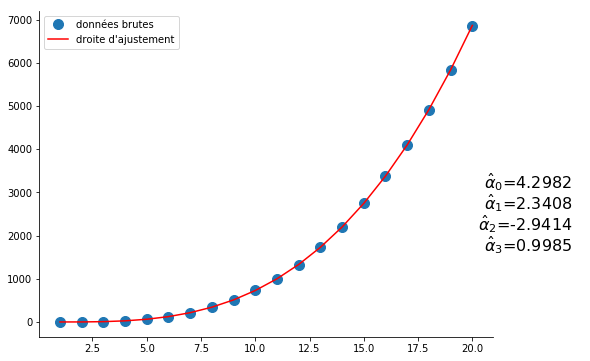

variance_erreurs=3.5136


3.513595080801363

In [23]:
Polynome_ajustement(donnees,degre=3)

In [32]:
import pandas
data = pandas.read_table("gdp.dat", sep= "\s+",   lineterminator='\n')
data


,YEAR,AUSTRIA,CANADA,FRANCE,GERMANY,GREECE,ITALY,SWEDEN,UK,USA
0,1950,0.027523,3.651109,10.652861,5.725433,18.423605,0.799001,17.072701,1.033571,4.470303
1,1951,0.029406,3.734242,11.186672,6.256754,19.866240,0.829484,17.445339,1.060015,4.734335
2,1952,0.029357,3.932222,11.480235,6.703080,19.750938,0.859817,17.011088,1.104598,4.826502
3,1953,0.030603,4.019939,11.688318,7.256435,22.217731,0.916962,18.063728,1.152221,4.981746
4,1954,0.033678,3.860731,12.092329,7.726440,22.690231,0.942153,19.031748,1.191948,4.790810
5,1955,0.037379,4.118041,12.561118,8.570349,24.180141,0.996193,19.471495,1.227778,5.032075
6,1956,0.039888,4.364902,13.194351,9.076571,26.030506,1.034456,19.972933,1.242018,5.052481
7,1957,0.042246,4.339562,13.843744,9.459310,27.510994,1.081672,20.300936,1.260623,5.056624
8,1958,0.043644,4.312412,14.090829,9.665697,28.514622,1.126020,20.645313,1.257567,4.949590
9,1959,0.044710,4.382468,14.370371,10.259906,29.260595,1.189722,21.608130,1.355527,5.154055


In [138]:
def Polynome_ajustement_year(data,YEAR,degre=1):
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    T=len(data)
    
    # récupérer l'estimateur
    theta=Polynome_Estimation(data,odre=degre)

    fig, ax = plt.subplots(figsize=(9, 6))

    ax.spines['top'].set_visible(False)  # cacher le cadre du haut
    ax.spines['right'].set_visible(False)  # cacher le cadre de droit

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    axe_X=numpy.array([t for t in range(1,T+1)])

    plt.plot(YEAR, data,'o', label=data.name, markersize=10)
    
    plt.plot(YEAR, valeur_polynome(axe_X,theta), 'r', label="droite d'ajustement")
        
    ax.set_title("K=%.4f"%degre)
    # ajouter la table des résultats
    columns = (' ')
    the_table = plt.table(cellText=numpy.array([['$\\hat{\\alpha}_{%d}$=%.4f'%(t, theta[t])] for t in range(len(theta))])
                          ,colLabels=columns, 
                          bbox=[0.95, 0.25, 0.25, 0.32],
                          edges="")
    
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(16)
    
    
    plt.subplots_adjust(left=0.2)
    plt.legend()
    plt.show()
    
    ## variance d'erreurs
    MM=vecteur_puissance_k(len(data),k=degre)
    E=data-numpy.dot(MM , theta)
    
    variance_erreurs=numpy.dot(E,E)/(1.0*(len(data)-len(theta)+1))
    print("variance_erreurs=%.4f"%variance_erreurs)
    return variance_erreurs

def Polynome_ajustement_year2(data,YEAR,degre=1):
    %matplotlib inline
    
    T=len(data)
    
    # récupérer l'estimateur
    theta=Polynome_Estimation(data,odre=degre)
    axe_X=numpy.array([t for t in range(1,T+1)])



    ## variance d'erreurs
    MM=vecteur_puissance_k(len(data),k=degre)
    E=data-numpy.dot(MM , theta)
    
    variance_erreurs=numpy.dot(E,E)/(1.0*(len(data)-len(theta)+1))
    return variance_erreurs

In [55]:
data.columns
theta=[]
theta.append(numpy.array(Polynome_Estimation(data[i],odre=5) for i in data.columns))


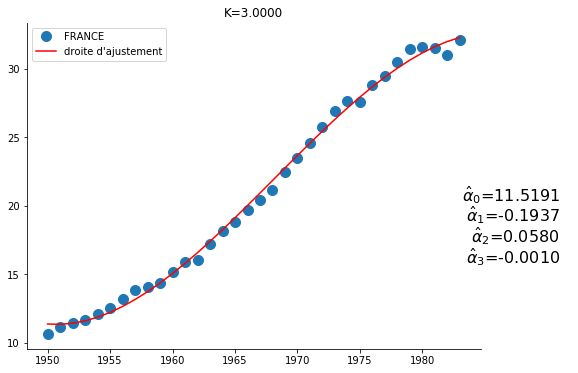

variance_erreurs=0.1905


0.19054390377389724

In [139]:
Polynome_ajustement_year(data['FRANCE'],data['YEAR'],3)


In [164]:
def adjust(data,country):
    E=[]
    for i in range(3,8):
        E.append(Polynome_ajustement_year2(data[country],data['YEAR'],i))
    
    return numpy.argmin(E)+3
    

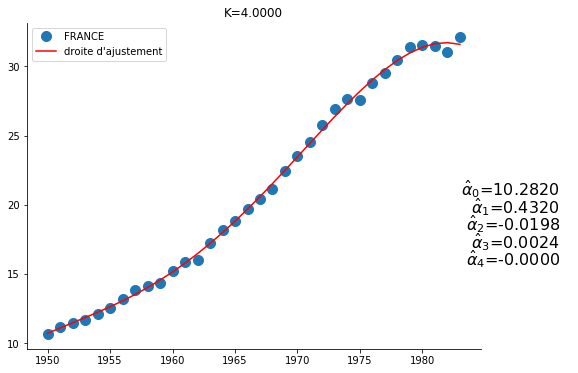

variance_erreurs=0.0900


0.0900495609920868

In [160]:
adjust(data,country='FRANCE')
Polynome_ajustement_year(data['FRANCE'],data['YEAR'],adjust(data,country='FRANCE'))

In [166]:
def Polynome_ajustement_total(data):
    for i in data.columns:
        if(i=='YEAR'):
            continue
        Polynome_ajustement_year(data[i],data['YEAR'],adjust(data,country=i))
    return
    

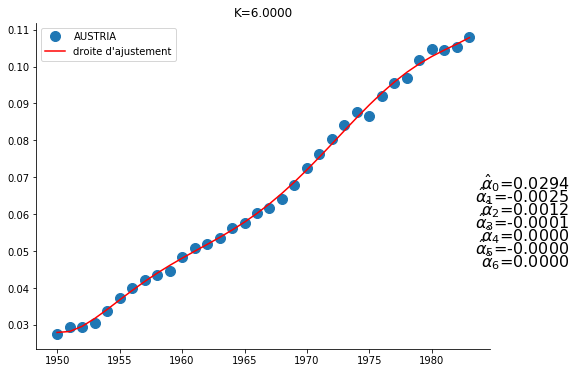

variance_erreurs=0.0000


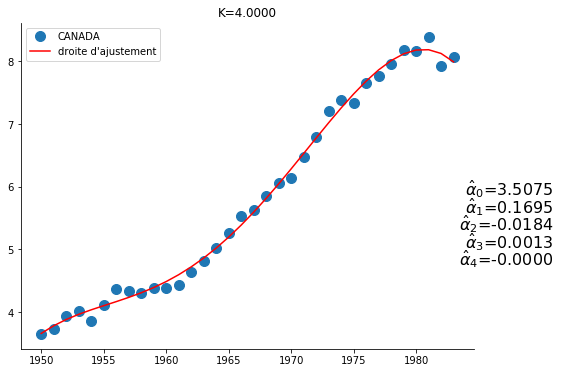

variance_erreurs=0.0122


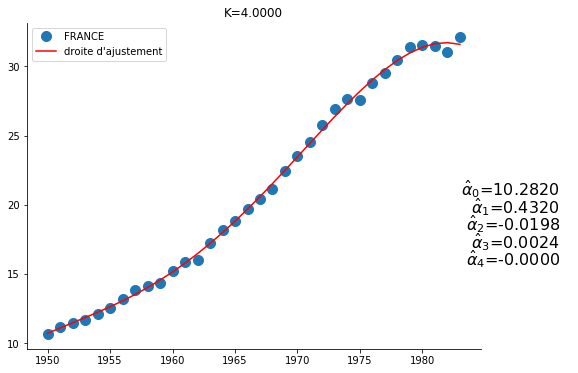

variance_erreurs=0.0900


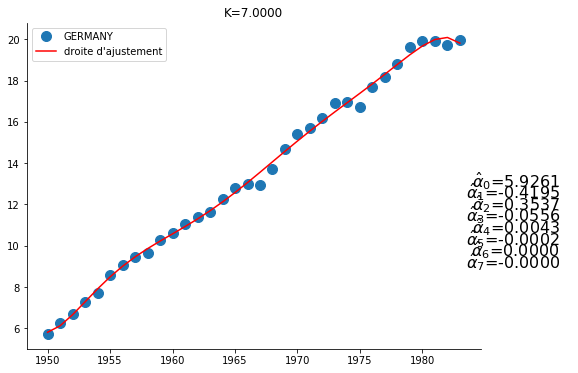

variance_erreurs=0.0701


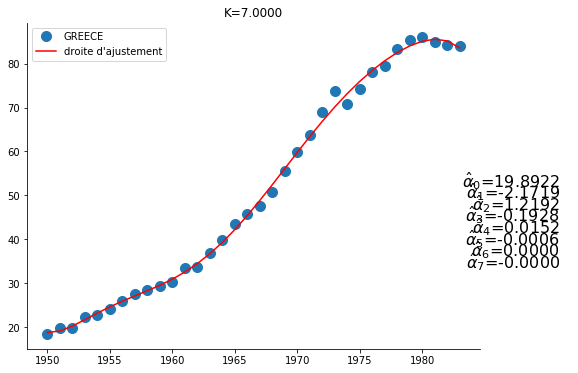

variance_erreurs=1.5610


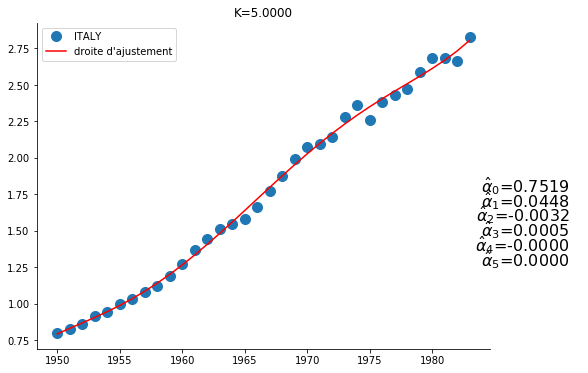

variance_erreurs=0.0015


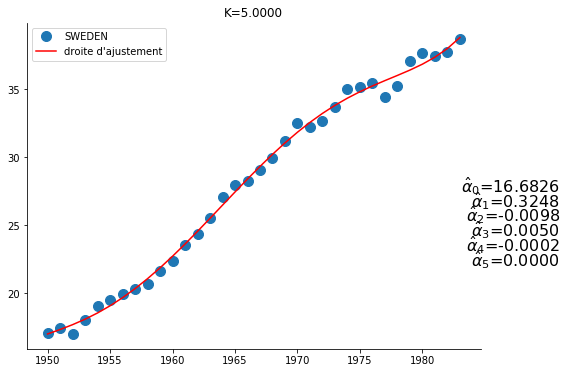

variance_erreurs=0.2362


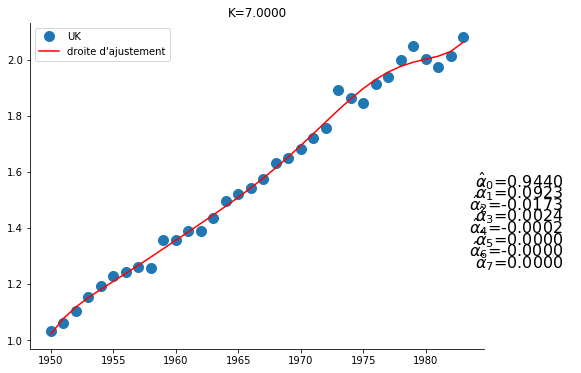

variance_erreurs=0.0007


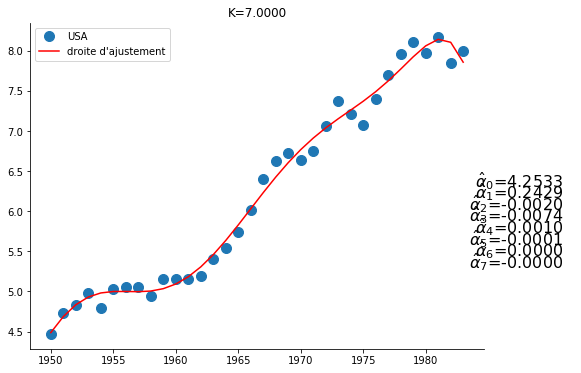

variance_erreurs=0.0203


In [167]:
Polynome_ajustement_total(data)